In [2]:
import scanpy as sc
import numpy as np
import anndata

In [3]:
adata = sc.read_10x_mtx(
    '/moto/kohwi/users/lining/scRNAoutput/outs/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [4]:
adata.var_names_make_unique()

In [5]:
adata

AnnData object with n_obs × n_vars = 4473 × 11875 
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'

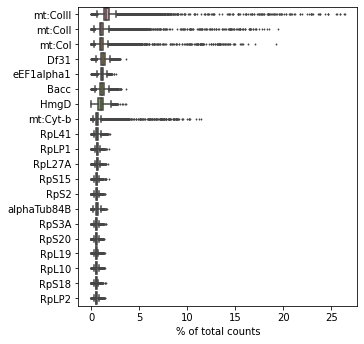

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

This step determines the percentage of mira in each cells

In [8]:
mira_genes = adata.var_names.str.startswith('mira')
mira_genes = mira_genes.tolist()
mira_genes = np.asarray(mira_genes, dtype=bool)
# for each cell compute fraction of counts in mira genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mira'] = np.sum(
    adata[:, mira_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'feature_types' as categorical


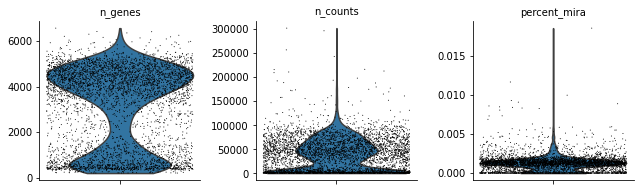

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mira'],
             jitter=0.4, multi_panel=True)

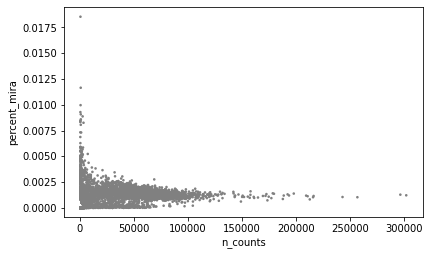

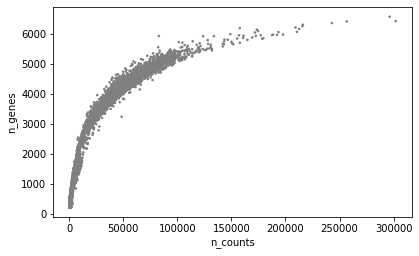

In [10]:
sc.pl.scatter(adata, x='n_counts', y='percent_mira')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

This step removes cells with no mira expression

In [11]:
adata = adata[adata.obs.percent_mira > 0.0, :]

In [12]:
adata

View of AnnData object with n_obs × n_vars = 4053 × 11875 
    obs: 'n_genes', 'percent_mira', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [13]:
dpn_genes = adata.var_names.str.startswith('dpn')
dpn_genes = dpn_genes.tolist()
dpn_genes = np.asarray(dpn_genes, dtype=bool)
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_dpn'] = np.sum(
    adata[:, dpn_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

Trying to set attribute `.obs` of view, copying.


In [14]:
adata = adata[adata.obs.percent_dpn > 0.0, :]

In [15]:
adata

View of AnnData object with n_obs × n_vars = 3317 × 11875 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [16]:
wor_genes = adata.var_names.str.startswith('wor')
wor_genes = wor_genes.tolist()
wor_genes = np.asarray(wor_genes, dtype=bool)
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_wor'] = np.sum(
    adata[:, wor_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

Trying to set attribute `.obs` of view, copying.


In [17]:
adata = adata[adata.obs.percent_wor > 0.0, :]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 3031 × 11875 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn', 'percent_wor'
    var: 'gene_ids', 'feature_types', 'n_cells'

Here, we have an AnnData object with dpn, wor, mira > 0

Let us assemple some information about mitochondrial genes, which are important for quality control.

Citing from “Simple Single Cell” workflows (Lun, McCarthy & Marioni, 2017):

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

In [19]:
mito_genes = adata.var_names.str.startswith('mt:')
mito_genes = mito_genes.tolist()
mito_genes = np.asarray(mito_genes, dtype=bool)
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

Trying to set attribute `.obs` of view, copying.


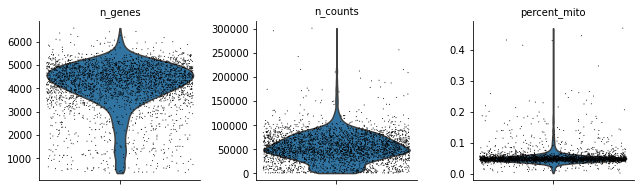

In [20]:

sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

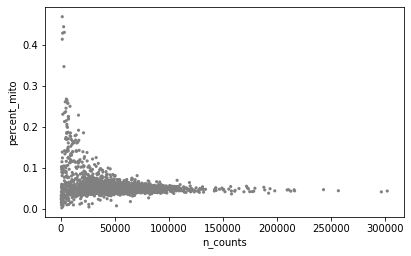

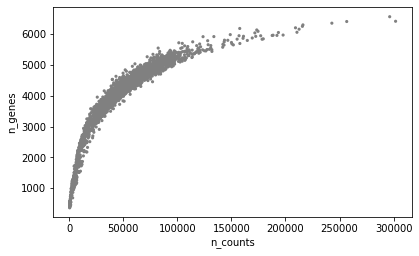

In [21]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Remove cells that have too many mitochondrial genes expressed or too many total counts.

In [22]:
adata = adata[adata.obs.n_genes < 5500, :]
adata = adata[adata.obs.percent_mito < 0.08, :]

These numbers require fine tuning by actually observing the plots

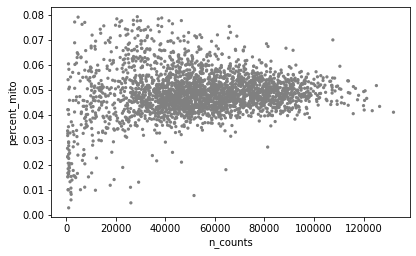

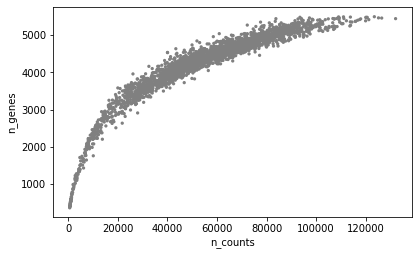

In [23]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [24]:
adata

View of AnnData object with n_obs × n_vars = 2800 × 11875 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn', 'percent_wor', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells'

## Here, we have completely finished the preprocessing part of the Anndata.

In [25]:
adata

View of AnnData object with n_obs × n_vars = 2800 × 11875 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn', 'percent_wor', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells'

Normalize the count matrix to 120,000 counts per cell
(This number can be determined by actually observing the data)

In [26]:
sc.pp.normalize_total(adata, target_sum=120000)

Logarithmize the data

In [27]:
sc.pp.log1p(adata)

In [28]:
adata.raw = adata

In [29]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

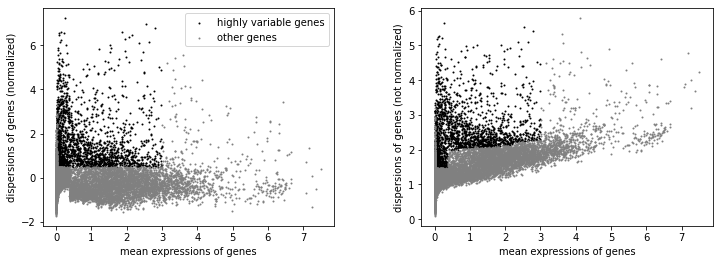

In [30]:
sc.pl.highly_variable_genes(adata)

In [31]:
adata = adata[:, adata.var.highly_variable]

In [32]:
adata

View of AnnData object with n_obs × n_vars = 2800 × 1888 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn', 'percent_wor', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [33]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mira','percent_dpn','percent_wor','percent_mito'])

Regress out effects of total counts per cell and the percentage of mitochondrial genes, mira, dpn, wor expressed.

Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [34]:
sc.pp.scale(adata, max_value=10)

Compute PCA

In [35]:
sc.tl.pca(adata, svd_solver='arpack')

You can change the color = 'svp' with the gene that you would like to observe. However, we won't be using this PCA data in the final analysis.

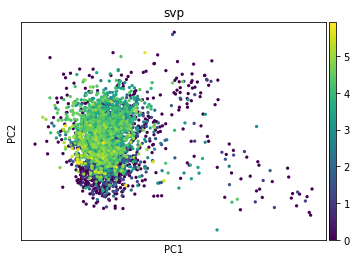

In [36]:
# Much better PCA compared to previous one without preprocessing
sc.pl.pca(adata, color = 'svp')

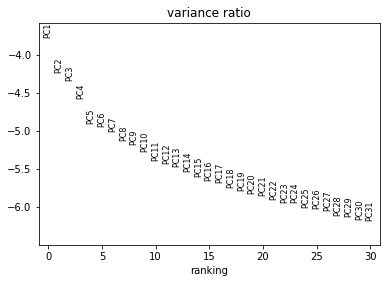

In [37]:
sc.pl.pca_variance_ratio(adata, log=True)

In [38]:
sc.pp.neighbors(adata, n_neighbors=21, n_pcs=40)

Compute the number of neighbors to be 21, as there are 21 different NBs in our dataset. Able to change n_pcs with the data that you prefer.

In [39]:
sc.tl.umap(adata)

Compute UMAP. It is potentially more faithful to the global connectivity of the manifold than tSNE, i.e., it better preservers trajectories. In some ocassions, you might still observe disconnected clusters and similar connectivity violations.

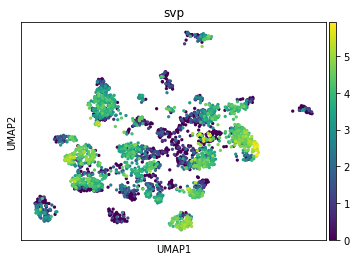

In [40]:
sc.pl.umap(adata, color=['svp'])

Much better cluster compared to the previous one in cellranger.

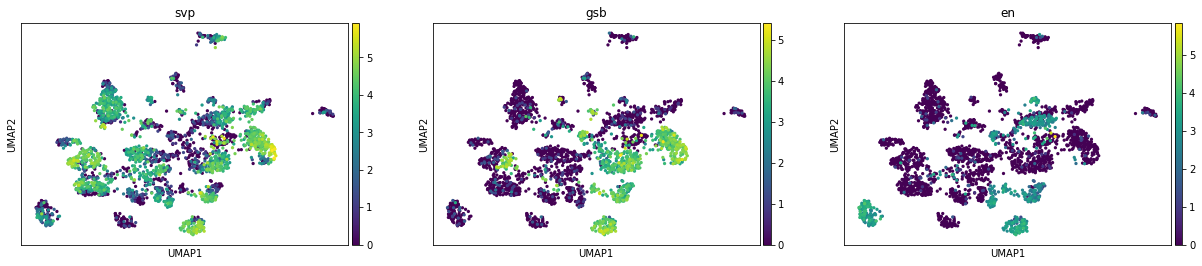

In [41]:
sc.pl.umap(adata, color=['svp','gsb','en'])

By listing the genes, we are able to observe different genes simultaneously. You can change the genes in color = [] to observe which genes are expressed in different clusters

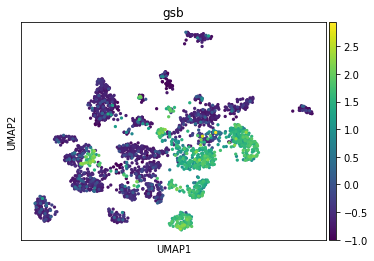

In [42]:
sc.pl.umap(adata, color='gsb', use_raw=False)

This code allows you to observe the values depending on the original values (no log transform, etc)

In [43]:
sc.tl.leiden(adata)

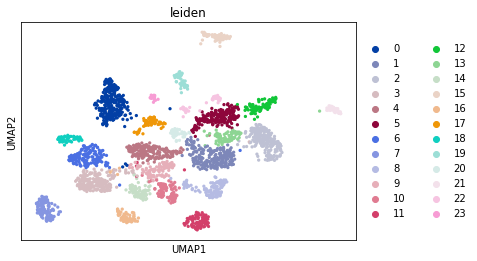

In [44]:
sc.pl.umap(adata, color=['leiden'])

This shows all the clusters that are determined by using the Leiden graph-clustering method.

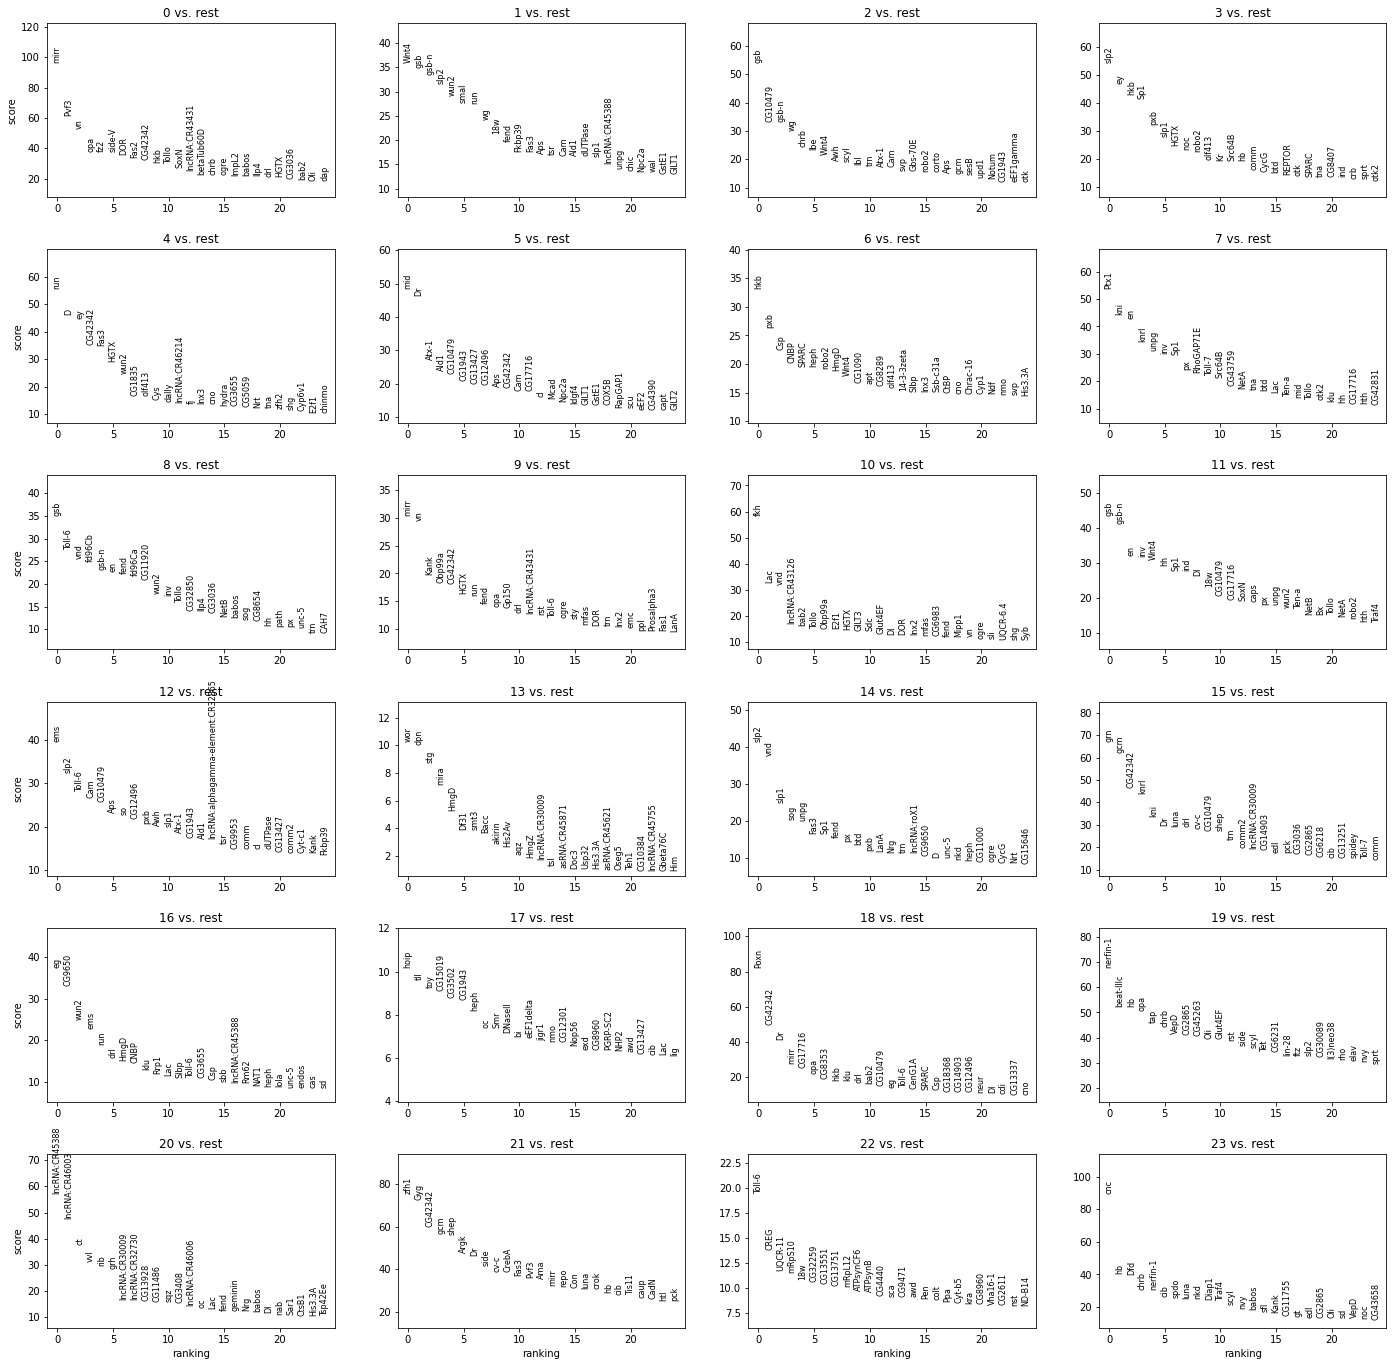

In [45]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

This shows the genes that are used to cluster the genes. This uses t-test method.

In [46]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:51)


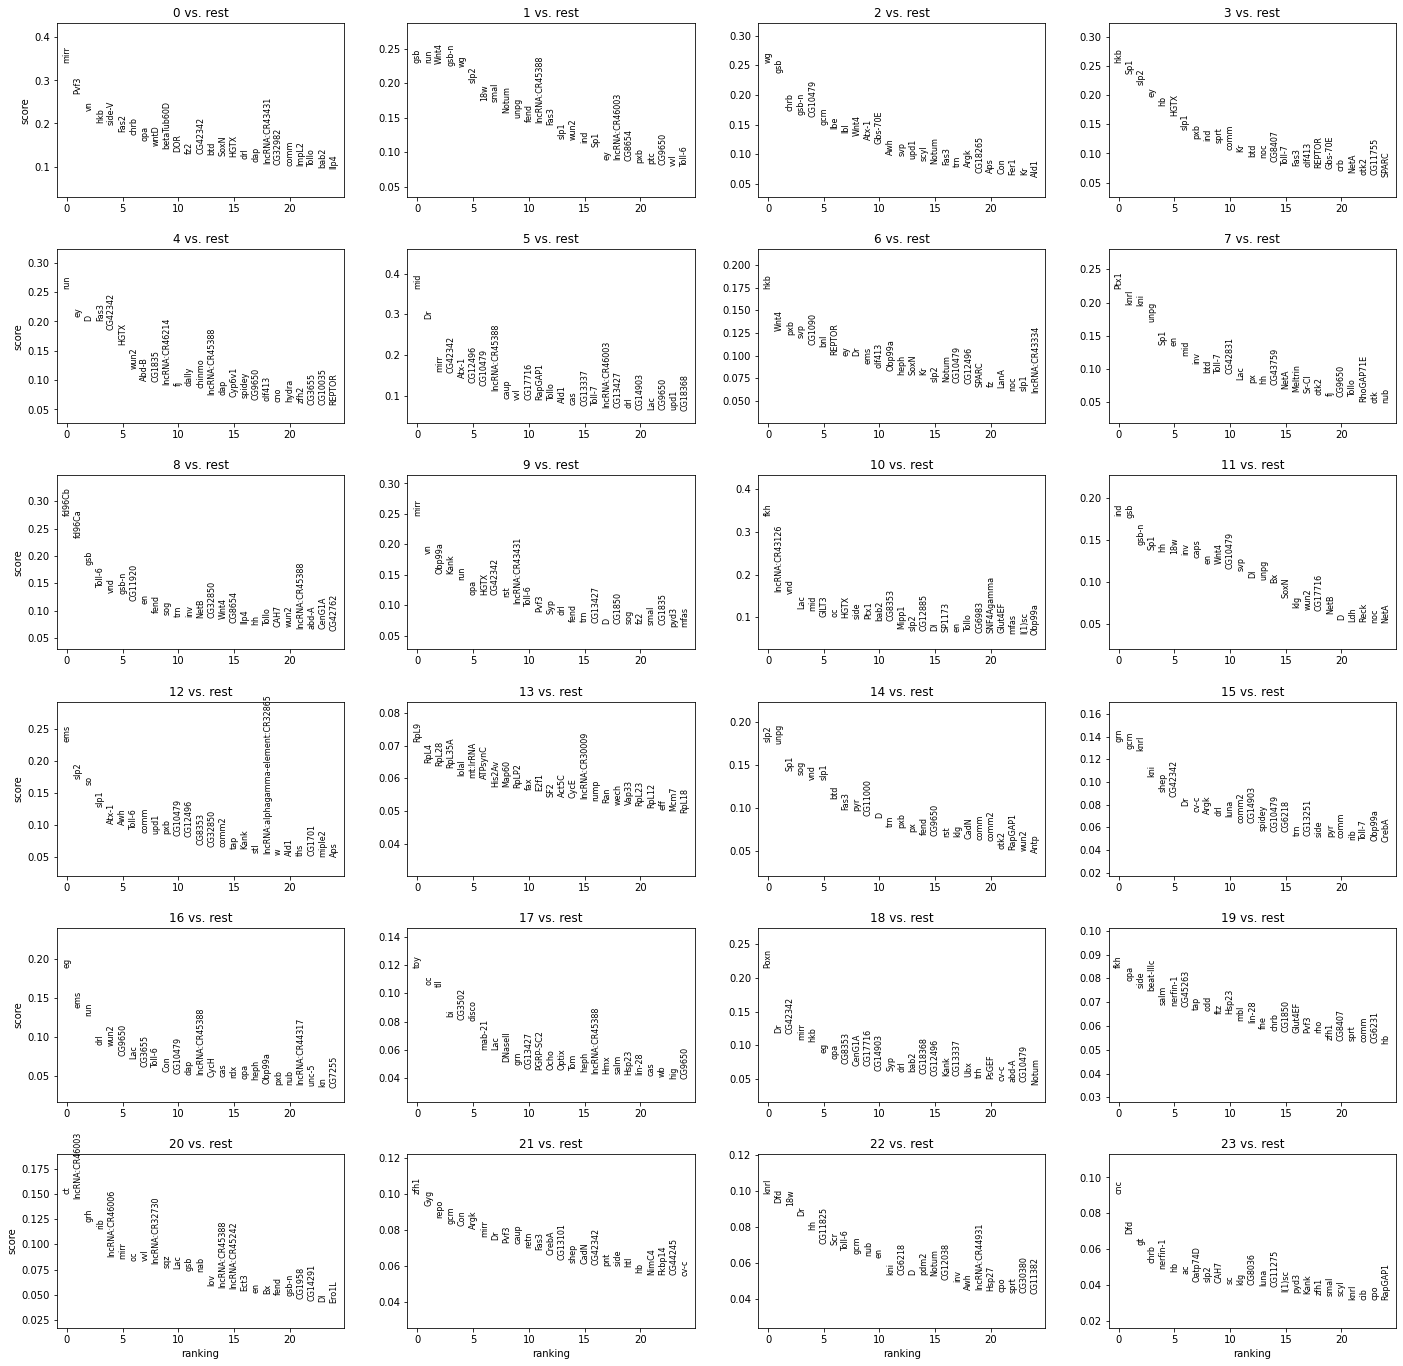

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

This method uses logistic regression to identify the important genes in individual clusters.

ranking genes
    finished (0:00:03)


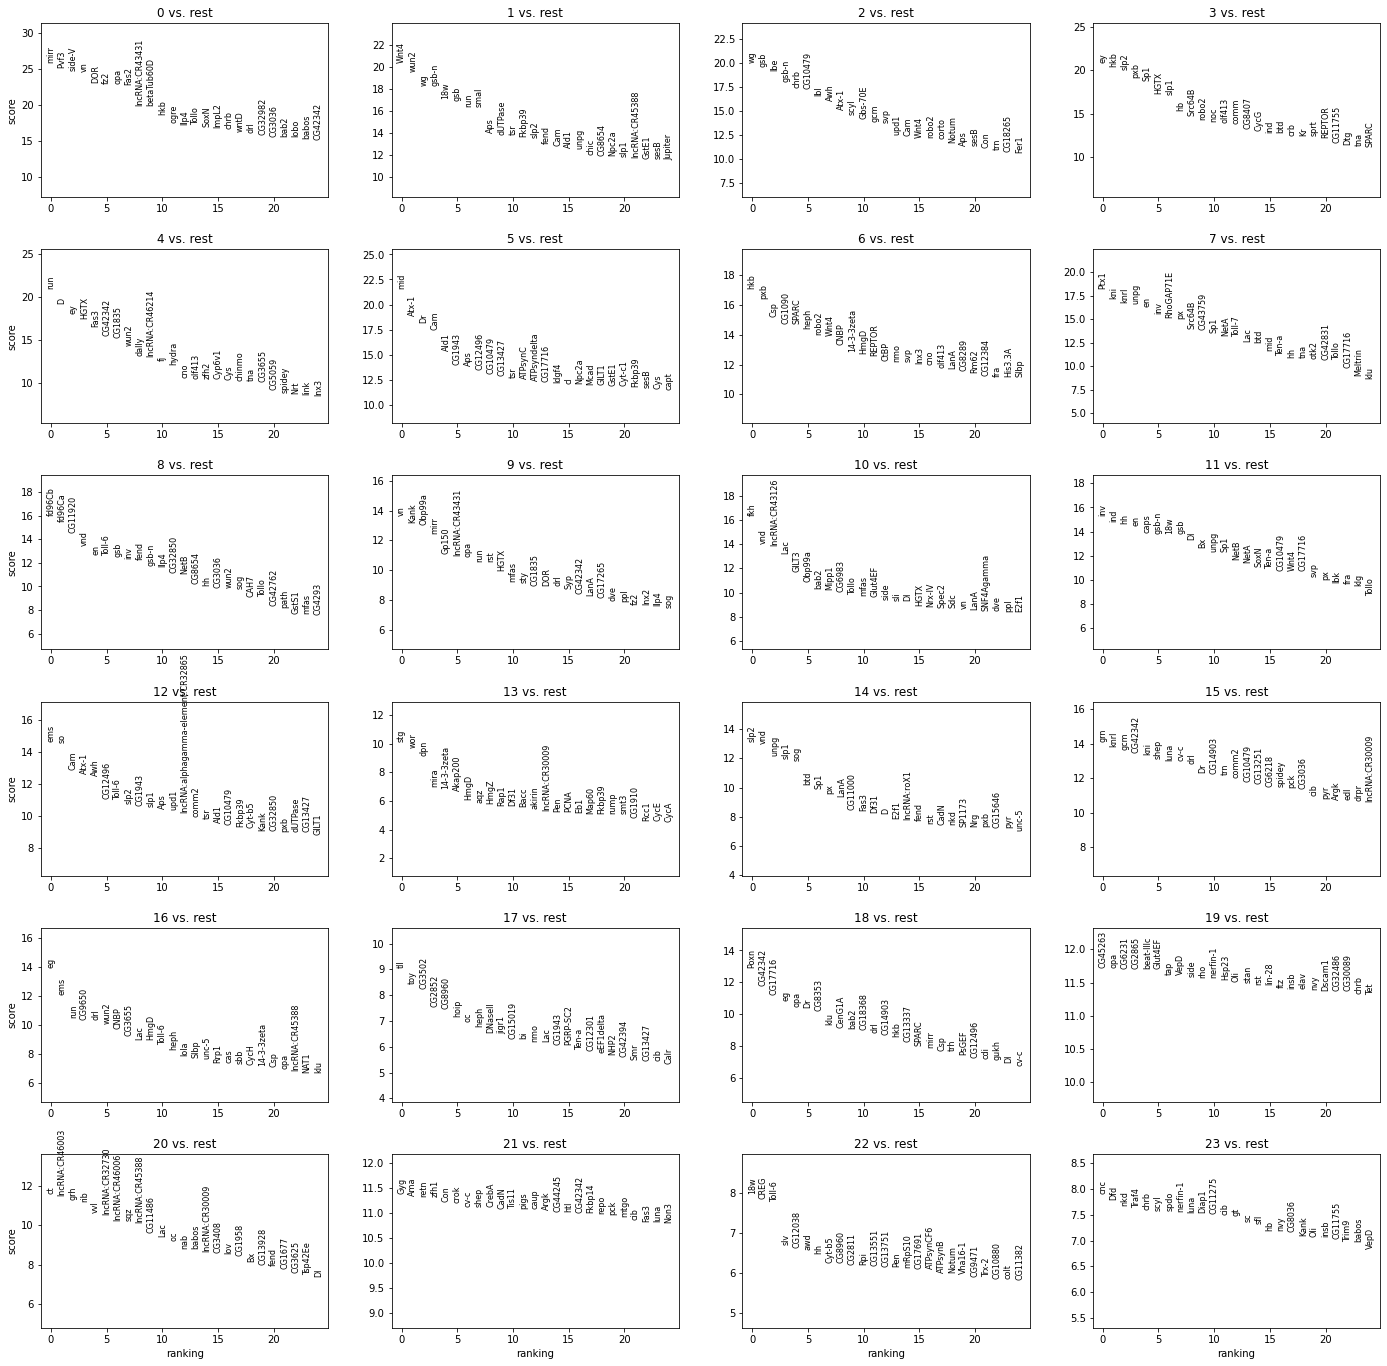

In [48]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

This shows the genes that are used to cluster the genes. This uses wilcoxon method.

In [49]:
import pandas as pd
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,mirr,Wnt4,wg,ey,run,mid,hkb,Ptx1,fd96Cb,vn,...,slp2,grn,eg,tll,Poxn,CG45263,ct,Gyg,18w,cnc
1,Pvf3,wun2,gsb,hkb,D,Atx-1,pxb,kni,fd96Ca,Kank,...,vnd,knrl,ems,toy,CG42342,opa,lncRNA:CR46003,Ama,CREG,Dfd
2,side-V,wg,lbe,slp2,ey,Dr,Csp,knrl,CG11920,Obp99a,...,unpg,gcm,run,CG3502,CG17716,CG6231,grh,retn,Toll-6,nkd
3,vn,gsb-n,gsb-n,pxb,HGTX,Cam,CG1090,unpg,vnd,mirr,...,slp1,CG42342,CG9650,CG2852,eg,CG2865,rib,zfh1,slv,Traf4
4,DOR,18w,chrb,Sp1,Fas3,Ald1,SPARC,en,en,Gp150,...,sog,kni,drl,CG8960,opa,beat-IIIc,vvl,Con,CG12038,chrb


This table shows the 5 top ranked genes per cluster in a dataframe. Change the number inside head() to determine the number of genes that you would like to observe

In [50]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,19_n,19_p,20_n,20_p,21_n,21_p,22_n,22_p,23_n,23_p
0,mirr,5.555305e-147,Wnt4,5.195396e-92,wg,1.114847e-88,ey,5.617439e-96,run,6.457214e-97,...,CG45263,9.967252e-32,ct,5.470646e-31,Gyg,4.850640e-30,18w,1.424546e-15,cnc,2.733659e-15
1,Pvf3,2.269600e-140,wun2,8.055071e-85,gsb,3.710691e-85,hkb,3.586322e-92,D,2.604033e-82,...,opa,1.029360e-31,lncRNA:CR46003,1.319762e-30,Ama,7.924039e-30,CREG,4.042764e-15,Dfd,6.583940e-15
2,side-V,1.111303e-135,wg,1.101524e-74,lbe,5.939971e-82,slp2,2.479193e-89,ey,4.877268e-73,...,CG6231,1.116860e-31,grh,2.014908e-29,retn,9.510578e-30,Toll-6,6.834553e-15,nkd,1.655400e-14
3,vn,1.464326e-133,gsb-n,1.975722e-74,gsb-n,1.159075e-72,pxb,2.829519e-81,HGTX,1.417821e-68,...,CG2865,1.153398e-31,rib,5.656006e-29,zfh1,1.007768e-29,slv,1.877120e-11,Traf4,2.480685e-14
4,DOR,6.122570e-118,18w,2.138799e-65,chrb,1.165066e-67,Sp1,6.628179e-79,Fas3,3.704061e-61,...,beat-IIIc,1.186022e-31,vvl,2.111796e-26,Con,2.687054e-29,CG12038,3.195550e-11,chrb,3.347006e-14


Same as before, but you are able to observe the scores of genes, in addition to the gene names. Low score indicates that the gene is located in that cluster.

ranking genes
    finished (0:00:00)


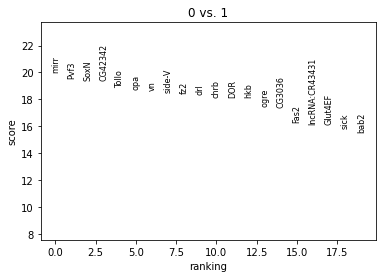

In [51]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

Compare one group with another group (group 0 vs group 1 in this case). You can change the group and reference by chaging the numbers.

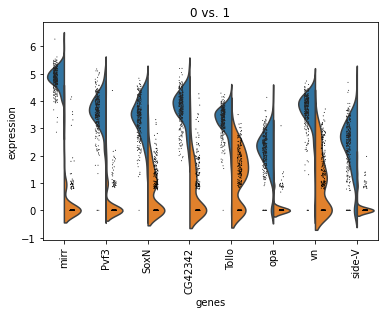

In [52]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

Here, blue indicates the gene expression in group 0, and the orange indicates the gene expression in group 1.

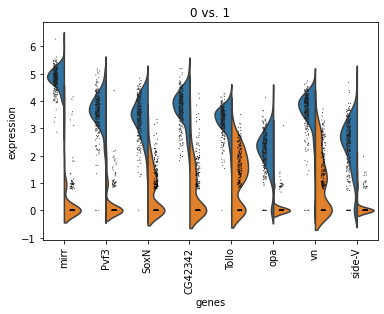

In [53]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [54]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

ranking genes
    finished (0:00:03)


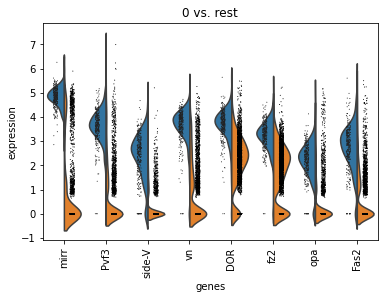

In [55]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

This plot compares the expression of group 0 cluster vs the rest

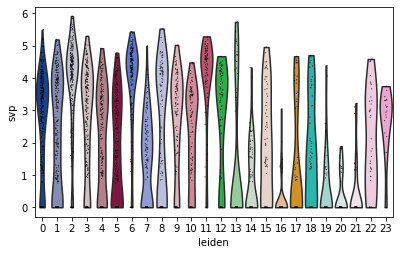

In [56]:
sc.pl.violin(adata, ['svp'], groupby='leiden')

Observe the expression of gene in all clusters. Change the gene name inside [] to observe the gene expression pattern in different clusters.

In [57]:
marker_genes = ['en','cas','hkb','svp','wg','ac','mirr','gsb','eag','ftz']

Create a list of NB marker genes

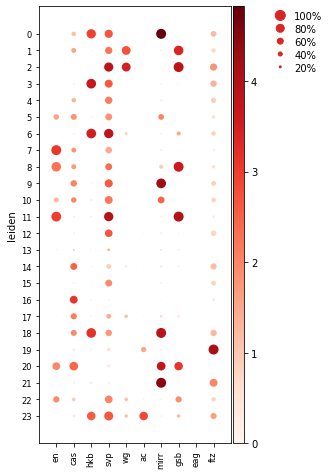

In [58]:
ax = sc.pl.dotplot(adata, marker_genes, groupby='leiden')

By this, we can visualize marker genes in individual clusters.

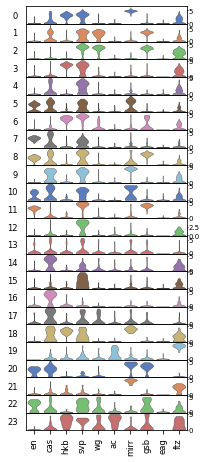

In [59]:
ax = sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)

This shows the violin plot of the gene expression in clusters.

In [60]:
adata

AnnData object with n_obs × n_vars = 2800 × 1888 
    obs: 'n_genes', 'percent_mira', 'n_counts', 'percent_dpn', 'percent_wor', 'percent_mito', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [61]:
adata.write(r'/moto/kohwi/users/daiki/anndata/s10NB_Analysis.h5ad')